# Workshop 2: Modelling Change

## Introduction

A **difference equation** defines a sequence by the difference between consecutive terms. To fully specify the sequence we also need an initial value. For example,

$$x_{i+1} = x_i + 0.1x_i \quad\mathrm{where}\quad x_0=10$$

defines a sequence where the initial value is $10$ and each term is $10\%$ bigger than the previous term.

Let's calculate the first 5 terms using Python. First, we create an array and set its first element to the initial value $10$.

In [1]:
import numpy as np

x = np.zeros(5)

x[0] = 10
print("x:", x)

x: [10.  0.  0.  0.  0.]


Next we use a `for` loop to calculate the remaining terms of the sequence.

In [2]:
for i in range(4):
    x[i+1] = x[i] + 0.1*x[i] 
    
print("x:", x)

x: [10.    11.    12.1   13.31  14.641]


:::{exercise}
:label: exercise_2_6

The array `x` has $5$ elements yet the upper limit of the `for` loop is $4$. Why? Try changing the upper limit to $5$ and see what happens.
:::

Finally, we would like to plot a graph of the first $5$ terms of the sequence. To do this we need to import a library, `matplotlib.pyplot`:

Text(0, 0.5, 'x[i]')

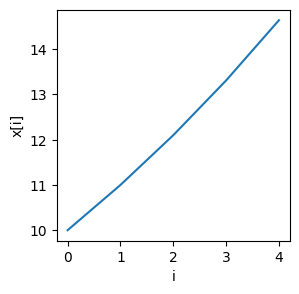

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(3,3))
plt.plot(x)
plt.xlabel("i")
plt.ylabel("x[i]")

:::{exercise}
:label: exercise_2_7

Calculate the value of $x_{16}$. Print the answer as follows:

```x[16]: XXXX```

:::

## Multiple Variables

We can produce more interesting behaviour if we introduce a second variable. For example,

$$\begin{align*}
x_{i+1} &= x_i - 0.5y_i\\
y_{i+1} &= y_i + 0.4x_i\quad\mathrm{where}~x_0=y_0=10.
\end{align*}$$

:::{exercise}
:label: exercise_2_8

Complete the following code to calculate and plot `x` and `y` over the range `0 ... 19`. Plot the resulting arrays on the same figure.

```
x = np.zeros(20)
x[0] = 10

# create array y and set initial value

for i in range(19):
    x[i+1] = x[i] - 0.5 * y[i]  

    # set value of y[i+1]

plt.figure(figsize=(3,3))
plt.plot(x)

# plot y on the SAME graph    
```
:::

## SIR Model of Epidemics

The spread of an infectious disease amongst a population can be modelled by the SIR model. We divide the the population into three groups: Susceptible, Infected and Recovered. As the epidemic progresses, the number of people in each group changes according to a set of simple rules. Let $S_i$ represent the number of susceptible people and $I_i$ the number of infected people on day $i$. Then:

:::{math}
:label: SIR_equations
\begin{align}S_{i+1} &= S_i - bS_iI_i\\
I_{i+1} &= I_i + bS_iI_i - aI_i.\end{align}
:::

We assume a fixed total population so that the number of people in the Recovered group is given by

$$R_i = N - (S_i + I_i)$$

where $N$ is the total population. There are two parameters: the recovery rate parameter $a$ and the infection rate parameter $b$.

### Simplified Model

First, let's examine a simplified version of this model where we assume that there are no susceptible people in the population and an initial population $I_0$ of infected people. Then, the equations reduce to:

$$ I_{i+1} = I_i - aI_i $$

A fixed proportion $a$ of the infected population recovers at each time step. Let's suppose that 10% of the population recovers each day so that $a=0.1$, and assume that our population starts with $I_0=1000$ infected people.

:::{exercise}
:label: exercise_2_9

Calculate (by hand) the first few terms of the sequence. What would you expect the graph $I_i$ to look like?

Write Python code to model the number of infected people for $100$ days. Plot a graph of $I_i$.
:::

### Full Model

Next we will model the full set of two equations {eq}`SIR_equations`. We'll assume that parameter values $a = 0.1$ and $b = 0.00005$ and the initial populations $S_0 = 20000$ and $I_0 = 100$.

:::{exercise}
:label: exercise_2_10

Adapt your code to model the full set of equations with parameter values and initial conditions as described above.

Hint: You should see that the number of infected people peaks at around 15,000 at about day 15, while the number of susceptible people drops to about zero at about the same time.
:::

### Investigating the Model

One of the benefits of modelling is that we can investigate the effect of changing particular parameters. For example, the Government can influence the rate parameter $b$ through public policy (for example the imposition of social distancing, vaccination or other measures) and so it would like to understand how changing the value of $b$ affects the outcome of the epidemic.

:::{exercise}
:label: exercise_2_11

Experiment with various values of $b$ to see how it affects the outbreak. Roughly what is the minimum value of $b$ which results in an epidemic? (We say there is an epidemic if $I_i$ initially rises to a peak, however small).

Then *on one graph* plot $I_i$ for 4 different values of $b$ (use a loop!).

:::

## Ballistics

Suppose a cannon located at position $x = 0, y = 0$ fires a cannonball at an angle $\theta$ from the horizontal (measured in radians) and speed $s$ m/s. We'd like to simulate the trajectory of the cannonball as in {numref}`cannon-fig`.

```{figure} cannon.jpg
---
height: 250px
name: cannon-fig
---

The trajectory of a cannonball fired at an angle $\theta$ from the horizontal and speed $s$ m/s.

```

We can model the motion of the cannonball using four variables: The x- and y-positions of the cannonable $x_i$ and $y_i$, and the x- and y-velocities of the cannonball $u_i$ and $v_i$.

The initial positions of $x_0$ and $y_0$ are both zero, and the initial velocities $u_0$ and $v_0$ can be calculated using simple trignometry:

$$
u_0 = s\cos(\theta)\\
v_0 = s\sin(\theta)
$$

Assuming a fixed simulation timestep $\Delta t$, we update the positions as below:

$$
\begin{align*}
x_{i+1} &= x_i + u_i\Delta t \\
y_{i+1} &= y_i + v_i\Delta t.
\end{align*}
$$

The x-velocity $u_i$ is constant, and the y-velocity changes due to the gravitational acceleration $g=9.81$ m/s.

$$
\begin{align*}
u_{i+1} &= u_i\\
v_{i+1} &= v_i - g\Delta t
\end{align*}
$$

```{exercise}
:label: exercise_2_12

Assuming that $s = 100$ m/s, $\theta= \pi/4$ and $\Delta t = 0.1$ s, write a program which plots a graph of the cannonball's trajectory sith $x_i$ on the x-axis and $y_i$ on the y-axis.

If you're having trouble getting started, take a peek at the partially-complete code template below.
```

:::{admonition} Click to view the code template
:class: dropdown
```{code} ipython3
n = 200
g = 9.81
dt = .1

theta = np.pi / 4
s = 100

x = np.zeros(n)
y = np.zeros(n)
u = np.zeros(n)
v = np.zeros(n)

# Enter your code to initialise
# the variables u[0] and v[0]

for i in range(n - 1):
    # Enter your code to
    # calculate x[i+1], y[i+1] u[i+1] and v[i+1]

plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Cannonball trajectory")
```
:::

```{exercise}
:label: exercise_2_13

Adapt your solution to the previous question so that the cannonball stops when it hits the ground. You can do this by adding the following update rule:

If $y_i + v_i\Delta t \leq 0$ then $x_{i+1} = x_i$ and  $y_{i+1} = u_{i+1} = v_{i+1} = 0$.

```

## Exercises

```{exercise}
:label: rate_equations_BZ_reaction_2

<!-- https://www3.nd.edu/~powers/mcdowell.pdf -->

The [Belousov–Zhabotinsky reaction](https://en.wikipedia.org/wiki/Belousov%E2%80%93Zhabotinsky_reaction), or BZ reaction, is a chemical reaction which exhibits non-equilbrium dynamics. Under certain conditions, the BZ reaction results in oscillatory behaviour, as demonstrated in [this video](https://www.youtube.com/watch?v=dMF4RjiITGM).

The BZ reaction can be modelled by the following equations, where $X_i$ and $Y_i$ are the concentrations of the two reactants X (red) and Y (colourless) at timestep $i$.

$$\begin{align}
X_{i+1} &= X_i + k_1-k_2X_i + k_3X_i^2Y_i\\
Y_{i+1} &= Y_i + k_4X_i - k_3X_i^2Y_i
\end{align}$$

where $k_1=0.2$, $k_2 = 0.4$, $k_3 = 0.1$ and $k_4 = 0.3$. The initial concentrations are zero and each timestep has a duration of one second.   

1. Write code to calculate $X_i$ and $Y_i$ for the first $300$ seconds. (Hint: you can use your answer to {numref}`exercise_2_8` as a template).
2. On on set of axes, plot a graph of $X$ and $Y$ against time, an in another on another plot $Y$ against $X$. Check that your plots look like the examples below. Notice how both $X$ and $Y$ reach a steady-state.
2. Keeping the other parameters fixed, experiment with different values of $k_1$ between $0.1$ and $0.3$. For what range of values of $k_1$ does the reaction reach a steady-state, and for which values dos it exhibit sustained oscillations?

```
```{exercise}
:label: rate_equations_logistic_map

A sequence is generated by repeatedly applying the logistic map

$$x_{i+1} = rx_i(1-x_i).$$

For example, if $x_0 = 0.2$ and $r = 2$ then the first three terms of the sequence are

$$0.2, 0.32, 0.4352.$$

1. Write a program which calculates an array `x` containing the the first $50$ terms of the logistic map and plots the result. Check that your plot looks like the plots below for $r=2.0$, $r=3.0$ and $r=4.0$.

2. Keeping $x_0 = 0.2$, Experiment with different values of $r$ between $0$ and $4$. By visually inspecting the plot, try to find roughly for which values of $r$ the terms of the sequence eventually (a) tend towards a fixed value (b) alternate between two values (c) jump around chaotically.

3. For $x_0 = 0.2$ and $r = 3$, use `np.max(x[-10:])` and `np.min(x[-10:])` to calculate the maximum and minimum values of the last 10 elements of `x` (to understand this syntax, look up 'array slicing' in this week's notes). Check that your answers correspond to the plots below for $r=2.0$, $r=3.0$ and $r=4.0$.

4. (Harder) Make a plot with `r` on the x-axis and the maximum and minimum value of the last 10 elements of `x` on  the y-axis. Your answer should look like the final plot below.
```

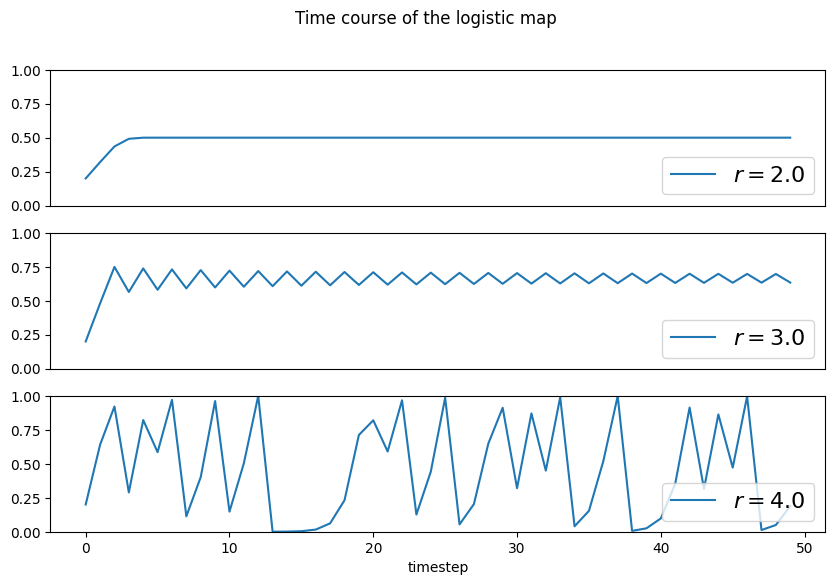

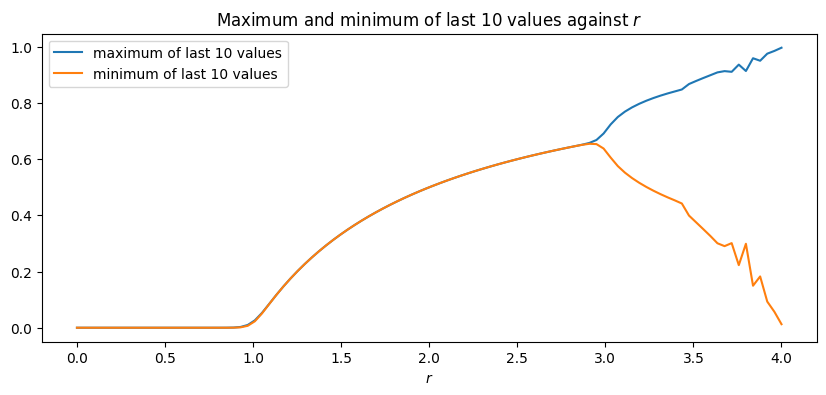

In [4]:
import numpy as np
import matplotlib.pyplot as plt

n = 50

fig, axs = plt.subplots(3,1, figsize=(10,6))

for k, r in enumerate([2.0, 3.0, 4.0]):

    x = np.zeros(n)
    x[0] = 0.2

    for i in range(n-1):
        x[i+1] = r*x[i]*(1-x[i])

    axs[k].plot(x, label="$r = {r:.1f}$".format(r = r))
    axs[k].legend(fontsize=16, loc=4)
    axs[k].set_ylim(0,1)
    if k < 2:
        axs[k].set_xticks([])
    
axs[2].set_xlabel("timestep")

fig.suptitle("Time course of the logistic map");

import numpy as np
import matplotlib.pyplot as plt

n = 50

N = 100
r_array = np.linspace(0, 4, N)
maxval = np.zeros(N)
minval = np.zeros(N)

plt.figure(figsize=(10,4))

for j in range(N):
    r = r_array[j] 
    x = np.zeros(n)
    x[0] = 0.2

    for i in range(n-1):
        x[i+1] = r*x[i]*(1-x[i])

    maxval[j] = np.max(x[-10:])
    minval[j] = np.min(x[-10:])

plt.xlabel("$r$")

plt.plot(r_array, maxval, label="maximum of last 10 values")
plt.plot(r_array, minval, label="minimum of last 10 values")

plt.legend();

plt.title("Maximum and minimum of last 10 values against $r$");

```{exercise} Motion of cannonball with air resistance
:label: cannonball_2

Suppose a cannon located at position $x = 0, y = 0$ fires a cannonball at an angle $\theta$ from the horizontal (measured in radians) and speed $s\mathrm{~m/s}$ ({numref}`cannon-fig`).

We can model the motion of the cannonball using four variables: The x- and y-positions of the cannonball $x_i$ and $y_i$, and the x- and y-velocities of the cannonball $u_i$ and $v_i$ where $i$ is the timestep. At each timestep, we update the variables as follows:

$$
\begin{align*}
x_{i+1} &= x_i + u_i\Delta t \\
y_{i+1} &= y_i + v_i\Delta t\\
u_{i+1} &= u_i - du_i\Delta t\\
v_{i+1} &= v_i - g\Delta t - dv_i\Delta t
\end{align*}
$$

unless $y_i + v_i\Delta t \leq 0$, in which case $x_{i+1} = x_i$ and  $y_{i+1} = u_{i+1} = v_{i+1} = 0$.

$g=9.81\mathrm{~m/s}$ is gravitational acceleration, $d = 0.25\mathrm{~s}^{-1}$ is a constant representing air resistance, and the time increment $\Delta t = 0.2\mathrm{~s}$.

**Part 1**

a. For $\theta = \pi/6$ and $s = 80\mathrm{~m/s}$ write a Python program which calculates four arrays `x`, `y`, `u` and `v` representing the x- and y-positions and x- and y-velocities respectively for the first 60 timesteps.

b. Create a figure showing `y` against `x`. Add a title and axis labels. 

c. Create an array `t` where `t[i]` is the time in seconds corresponding to timestep `i`. Plot `x` against `t` and `y` against `t` on the same figure. Add a title and axis labels and use `plt.legend()` to add a legend to your plot.

d. Print the horizontal distance travelled by the cannonball (i.e. the x-coordinate of the cannonball when it hits the ground).

**Part 2**

a. For fifty values of $\theta$ from $0$ to $\pi/2$, and all other parameter values the same as Question 1, calculate the horizontal distance travelled by the cannonball and plot a graph of this value against $\theta$.

b. Use the function `np.argmax` to determine the angle which results in the maximum horizontal distance.